# PROJECT : SPAM DETECTION

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sp=pd.read_csv("C:\\Users\\s-gd\\OneDrive\\Desktop\\CS_Assignments\\Assignment_6/SMSSpamCollection.csv",sep="\t",names=['target','messages'])

In [4]:
sp.head()

,target,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
sp.shape

(5572, 2)

In [6]:
count=sp['target'].value_counts()
print(count)

ham     4825
spam     747
Name: target, dtype: int64


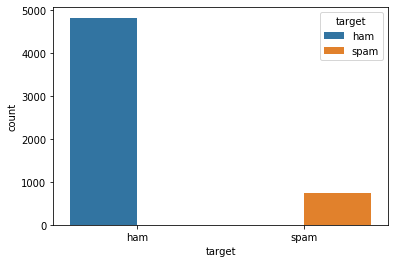

In [7]:
sns.countplot(data=sp,hue='target',x='target')
plt.show()

In [8]:
#pip install wordcloud

In [9]:
#conda install -c conda-forge wordcloud 

In [10]:
from wordcloud import WordCloud,STOPWORDS

In [11]:
sp_ham=sp.loc[sp['target']=='ham',:]
sp_ham.head()

,target,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...


In [12]:
sp_ham['target'].value_counts()

ham    4825
Name: target, dtype: int64

In [13]:
words=' '.join(sp_ham['messages'])
print(words)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... U dun say so early hor... U c already then say... Nah I don't think he goes to usf, he lives around here though Even my brother is not like to speak with me. They treat me like aids patent. As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today. I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times. I HAVE A DATE ON SUNDAY WITH WILL!! Oh k...i'm watching here:) Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet. Fine if thats the way u feel. Thats the way its gota 

In [14]:
sp_ham=sp.loc[sp['target']=='ham',:]
words=' '.join(sp_ham['messages'])
cleaned_word = " " .join([word for word in words.split()
               if 'http' not in word
               and not word.startswith("@")
               and word !='RT'
               ])

In [15]:
wordcloud=WordCloud(stopwords=STOPWORDS,
                   background_color ='black',
                   width=1600,
                   height=800
                   ).generate(cleaned_word)

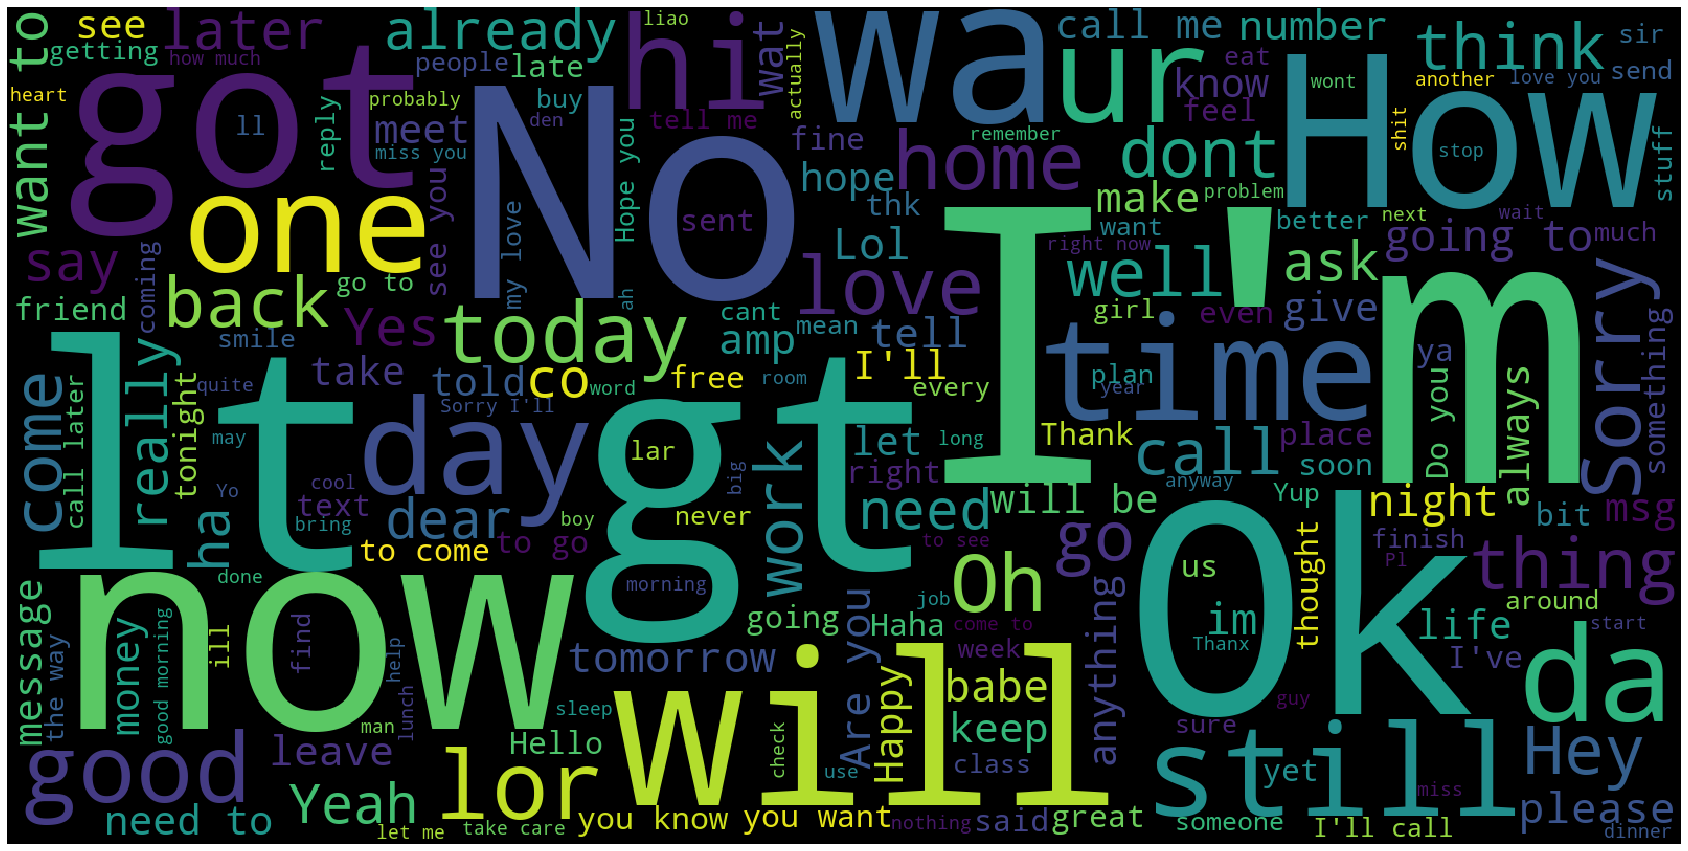

In [16]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [17]:
sp_spam=sp.loc[sp['target']=='spam',:]
sp_spam.head()

,target,messages
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [18]:
sp_spam['target'].value_counts()

spam    747
Name: target, dtype: int64

In [77]:
words=' '.join(sp_spam['messages'])
print(words)

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or clic

In [20]:
sp_spam=sp.loc[sp['target']=='spam',:]


words=' '.join(sp_spam['messages'])


cleaned_word = " " .join([word for word in words.split()
               if 'http' not in word
               and not word.startswith("@")
               and word !='RT'
               ])

In [21]:
wordcloud=WordCloud(stopwords=STOPWORDS,
                   background_color ='black',
                   width=1600,
                   height=800
                   ).generate(cleaned_word)

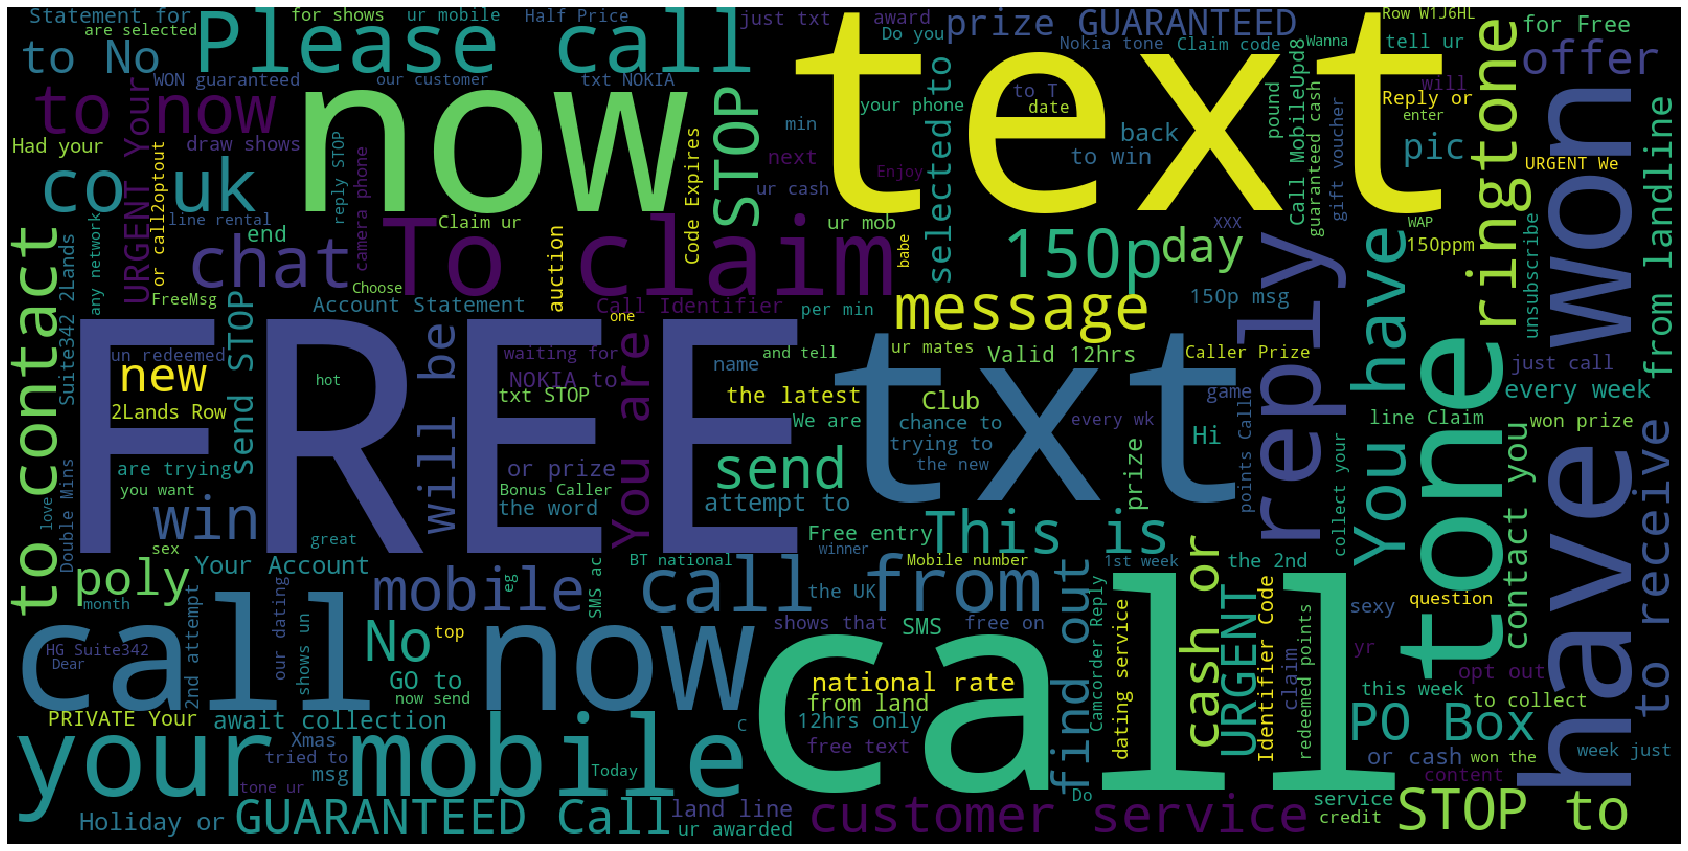

In [22]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [23]:
#import nltk
#nltk.download('stopwords')

In [24]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [25]:
#nltk.download('stopwords')

In [26]:
#nltk.download('wordnet')

In [27]:
stemmer = PorterStemmer()

In [28]:
lemmatizer = WordNetLemmatizer()

In [29]:
clean_sp_lst = []

sp_len_lst = []

In [30]:
#preprocessing the data
def preprocess(sp_raw, flag):
    
    letters_only = re.sub("[^a-zA-Z]", " ",sp_raw)
    
    l_o = letters_only  
    
    l_o = letters_only.lower()
    
    words = letters_only.split()
    
    words = [w for w in words if not w in stopwords.words('english')]
    
    
    if(flag == 'stem'):
         words = [stemmer.stem(word) for word in words]
    else:
         words = [lemmatizer.lemmatize(word) for word in words]
            
              
    clean_sp_lst.append(" ".join(words))
    
    
    sp_len_lst.append(len(words))

In [31]:
from tqdm import tqdm,tqdm_notebook
tqdm.pandas()

In [32]:
    clean_sp_lst = []
    
    sp_len_lst = []
    
    sp['messages'].progress_apply(lambda x: preprocess(x , 'stem'))

    sp['clean_sp_stem'] = clean_sp_lst  

    sp['sp_len_stem'] = sp_len_lst 

    

100%|█████████████████████████████████████████████████████████████████████████████| 5572/5572 [00:30<00:00, 182.57it/s]


In [33]:
clean_sp_lst = []

sp_len_lst = []

sp['messages'].progress_apply(lambda x: preprocess(x,'lemma'))

sp['clean_sp_lemma'] = clean_sp_lst

sp['sp_len_lemma'] = sp_len_lst

100%|█████████████████████████████████████████████████████████████████████████████| 5572/5572 [00:31<00:00, 177.80it/s]


In [34]:
sp.head()

,target,messages,clean_sp_stem,sp_len_stem,clean_sp_lemma,sp_len_lemma
0,ham,"Go until jurong point, crazy.. Available only ...",Go jurong point crazi avail bugi n great world...,16,Go jurong point crazy Available bugis n great ...,16
1,ham,Ok lar... Joking wif u oni...,Ok lar joke wif u oni,6,Ok lar Joking wif u oni,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win FA cup final tkt st m...,22,Free entry wkly comp win FA Cup final tkts st ...,22
3,ham,U dun say so early hor... U c already then say...,U dun say earli hor U c alreadi say,9,U dun say early hor U c already say,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah I think goe usf live around though,8,Nah I think go usf life around though,8


In [35]:
#data prepraration
sp['type_mess']=sp['target'].apply(lambda x: 1 if x=='spam' else 0)
sp.head()

,target,messages,clean_sp_stem,sp_len_stem,clean_sp_lemma,sp_len_lemma,type_mess
0,ham,"Go until jurong point, crazy.. Available only ...",Go jurong point crazi avail bugi n great world...,16,Go jurong point crazy Available bugis n great ...,16,0
1,ham,Ok lar... Joking wif u oni...,Ok lar joke wif u oni,6,Ok lar Joking wif u oni,6,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win FA cup final tkt st m...,22,Free entry wkly comp win FA Cup final tkts st ...,22,1
3,ham,U dun say so early hor... U c already then say...,U dun say earli hor U c alreadi say,9,U dun say early hor U c already say,9,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah I think goe usf live around though,8,Nah I think go usf life around though,8,0


In [36]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(sp,test_size=0.5,random_state=100)

In [37]:
sp_train_clean=[]

for spm in train['clean_sp_stem']:
    sp_train_clean.append(spm)
    
    
sp_test_clean=[]

for spm in test['clean_sp_stem']:
    sp_test_clean.append(spm)    

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = 'word')

train_features = vectorizer.fit_transform(sp_train_clean)

test_features = vectorizer.transform(sp_test_clean)

In [39]:
vectorizer.vocabulary_

{'hey': 1709,
 'gal': 1485,
 'anyon': 172,
 'go': 1543,
 'drive': 1080,
 'centr': 626,
 'tmr': 3899,
 'she': 3376,
 'said': 3260,
 'mind': 2394,
 'bedroom': 361,
 'minut': 2403,
 'ok': 2680,
 'sed': 3325,
 'sexi': 3357,
 'mood': 2456,
 'came': 579,
 'latr': 2118,
 'wid': 4282,
 'cake': 562,
 'my': 2518,
 'wife': 4285,
 'excel': 1240,
 'are': 200,
 'readi': 3098,
 'moan': 2427,
 'scream': 3310,
 'ecstasi': 1125,
 'thanx': 3820,
 'birthday': 415,
 'alreadi': 119,
 'yeah': 4408,
 'basic': 330,
 'time': 3881,
 'next': 2579,
 'week': 4233,
 'get': 1520,
 'away': 283,
 'mom': 2445,
 'amp': 140,
 'do': 1030,
 'want': 4193,
 'new': 2574,
 'video': 4133,
 'phone': 2858,
 'anytim': 175,
 'network': 2571,
 'min': 2392,
 'inclus': 1854,
 'call': 568,
 'and': 149,
 'download': 1067,
 'per': 2833,
 'free': 1430,
 'deltomorrow': 943,
 'repli': 3164,
 'now': 2633,
 'later': 2116,
 'fantasi': 1289,
 'footbal': 1402,
 'back': 298,
 'tv': 4004,
 'ski': 3456,
 'gamestar': 1488,
 'activ': 40,
 'play': 2892

In [40]:
print('Total unique words :' , len(vectorizer.vocabulary_))
print('Type of train_features :' , type(train_features))
print('Shape of input data :' , train_features.shape)

Total unique words : 4456
Type of train_features : <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data : (2786, 4456)


In [41]:
#Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score

In [42]:
classifiers = [LogisticRegression(),
              DecisionTreeClassifier(),
              RandomForestClassifier()]

In [43]:
dense_feature = train_features.toarray()

dense_test = test_features.toarray()

for classifier in tqdm(classifiers):
    fit = classifier.fit(dense_feature,train['type_mess'])
    pred=fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['type_mess'])
    print ('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))
    

 33%|████████████████████████████                                                        | 1/3 [00:01<00:02,  1.25s/it]

Accuracy of LogisticRegression is 0.9784637473079684


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:08<00:03,  3.16s/it]

Accuracy of DecisionTreeClassifier is 0.9651830581478823


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:22<00:00,  7.37s/it]

Accuracy of RandomForestClassifier is 0.9723618090452262


In [44]:
dense_features = train_features.toarray() 

model = LogisticRegression()

model.fit(dense_features,train['type_mess'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
import pickle
from pickle import dump

In [46]:
dump(vectorizer, open('pickle/countvectorizer.pkl' , 'wb'))

dump(model, open('pickle/logit_model.pkl','wb'))

In [47]:
from pickle import load
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [67]:
def preprocess(sp_raw):
    letters_only = re.sub("[^a-zA-Z]"," ",sp_raw)
    
    l_o = letters_only
    
    l_o = letters_only.lower()
    
    words = letters_only.split()
    
    words = [w for w in words if not w in stopwords.words('english')]
    
    
    stemmer = PorterStemmer()
    words=[stemmer.stem(word) for word in words]
   
    
    clean_sp=" ".join('words')
    
    return clean_sp

In [68]:
def predict(spm):
        vectorizer = load(open('pickle/countvectorizer.pkl' , 'rb'))
        
        classifier = load(open('pickle/logit_model.pkl' , 'rb'))
        
        clean_spm = preprocess(spm)
        
        clean_spm_encoded = vectorizer.transform([clean_spm])
        
        spm_input = clean_spm_encoded.toarray()
        
        prediction = classifier.predict(spm_input)
        
        return prediction

In [ ]:
spm = input("Enter a spam to check it's message type : ")

prediction = predict(spm)

print(prediction)

In [82]:
if (prediction == 1):
    print('Spam message')
else:
    print("Ham message")

Ham message
